In [45]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params
from model_analyzer import ModelAnalyzer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
model_id="meta-llama/Llama-2-13b-hf"
hardware="nvidia_A6000"
analyzer=ModelAnalyzer(model_id,hardware)

use config file configs/Llama.py for meta-llama/Llama-2-13b-hf


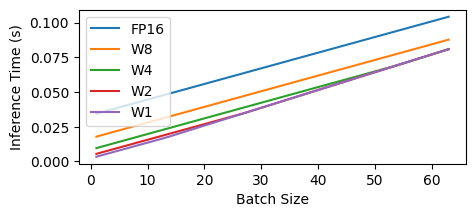

In [47]:
fig=plt.figure(figsize=(5, 2))
for wbit in [16,8,4,2,1]:
    batchsizes=range(1,64)
    ys=[]
    for batchsize in batchsizes:
        result=analyzer.analyze(1024,batchsize,wbit,16,16)
        ys.append(result["network_results"]["decode"]["inference_time"])
    plt.plot(batchsizes,ys,label=f"W{wbit}" if wbit!=16 else "FP16")
plt.legend()
plt.ylabel("Inference Time (s)")
plt.xlabel("Batch Size")
plt.savefig("../output/quantization_memory_access_batch.pdf",bbox_inches='tight')

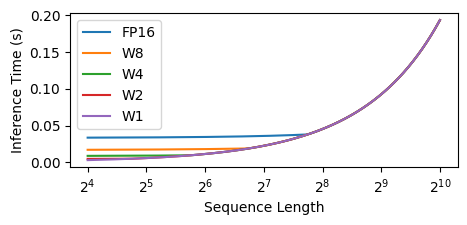

In [48]:
fig=plt.figure(figsize=(5, 2))
for wbit in [16,8,4,2,1]:
    seqlens=range(4, 11)
    seqlens=range(16,1024)
    ys=[]
    for seqlen in seqlens:
        # seqlen=2**seqlen
        result=analyzer.analyze(seqlen,1,wbit,16,16)
        ys.append(result["network_results"]["prefill"]["inference_time"])
    plt.plot(seqlens,ys,label=f"W{wbit}" if wbit!=16 else "FP16")
plt.legend()
plt.xscale('log',base=2)
plt.ylabel("Inference Time (s)")
plt.xlabel("Sequence Length")
plt.savefig("../output/quantization_memory_access_seq_len.pdf",bbox_inches='tight')